# Requirements

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/user_behavior_data.csv')

In [ ]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


Preprocess the input and the output variables appropriately.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
categorical = ['Device Model', 'Operating System', 'Gender']
df[categorical] = enc.fit_transform(df[categorical])
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0.0,0.0,393,6.4,1872,67,1122.0,40.0,1.0,4
1,2,1.0,0.0,268,4.7,1331,42,944.0,47.0,0.0,3
2,3,3.0,0.0,154,4.0,761,32,NaN,42.0,1.0,2
3,4,0.0,0.0,239,4.8,1676,56,871.0,20.0,1.0,3
4,5,4.0,1.0,187,4.3,1367,58,988.0,31.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,4.0,1.0,92,3.9,1082,26,NaN,22.0,1.0,2
696,697,3.0,0.0,316,6.8,1965,68,NaN,59.0,1.0,4
697,698,0.0,0.0,99,3.1,942,22,457.0,50.0,0.0,2
698,699,2.0,0.0,62,1.7,431,13,224.0,44.0,1.0,1


Explore the dataset using visualizations of your choice.

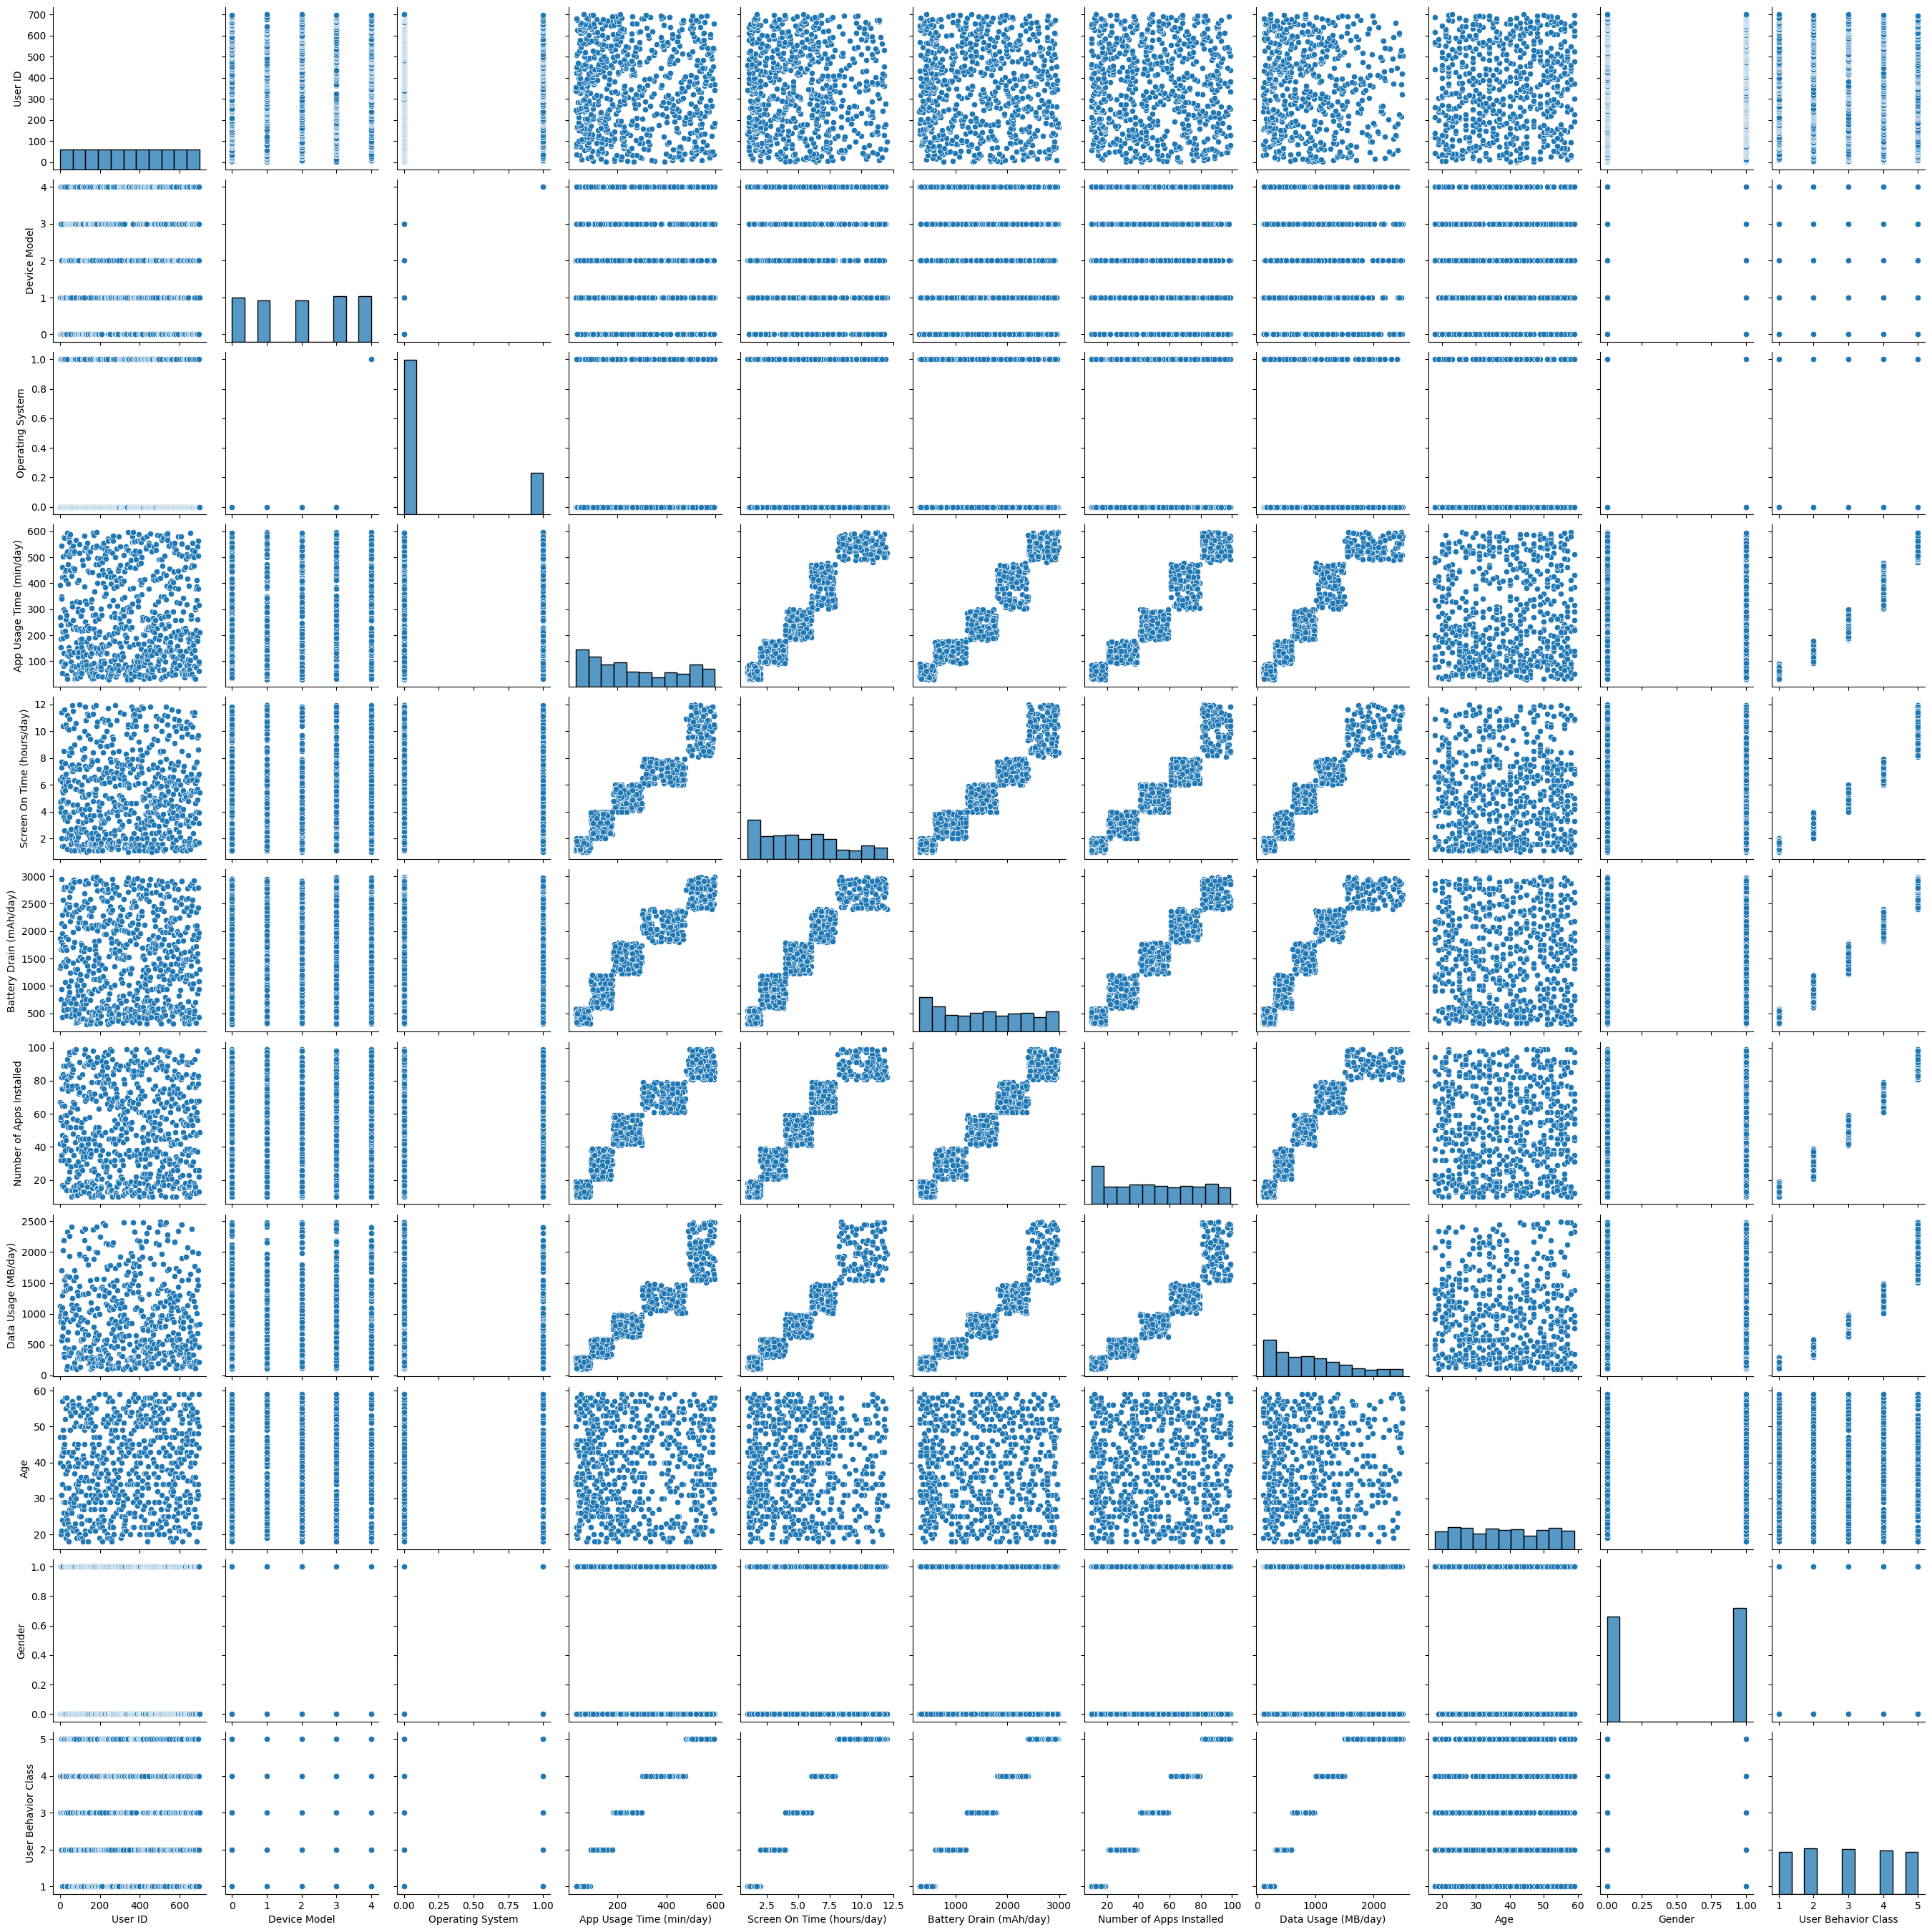

In [ ]:
sns.pairplot(df)

Check if the dataset is balanced.

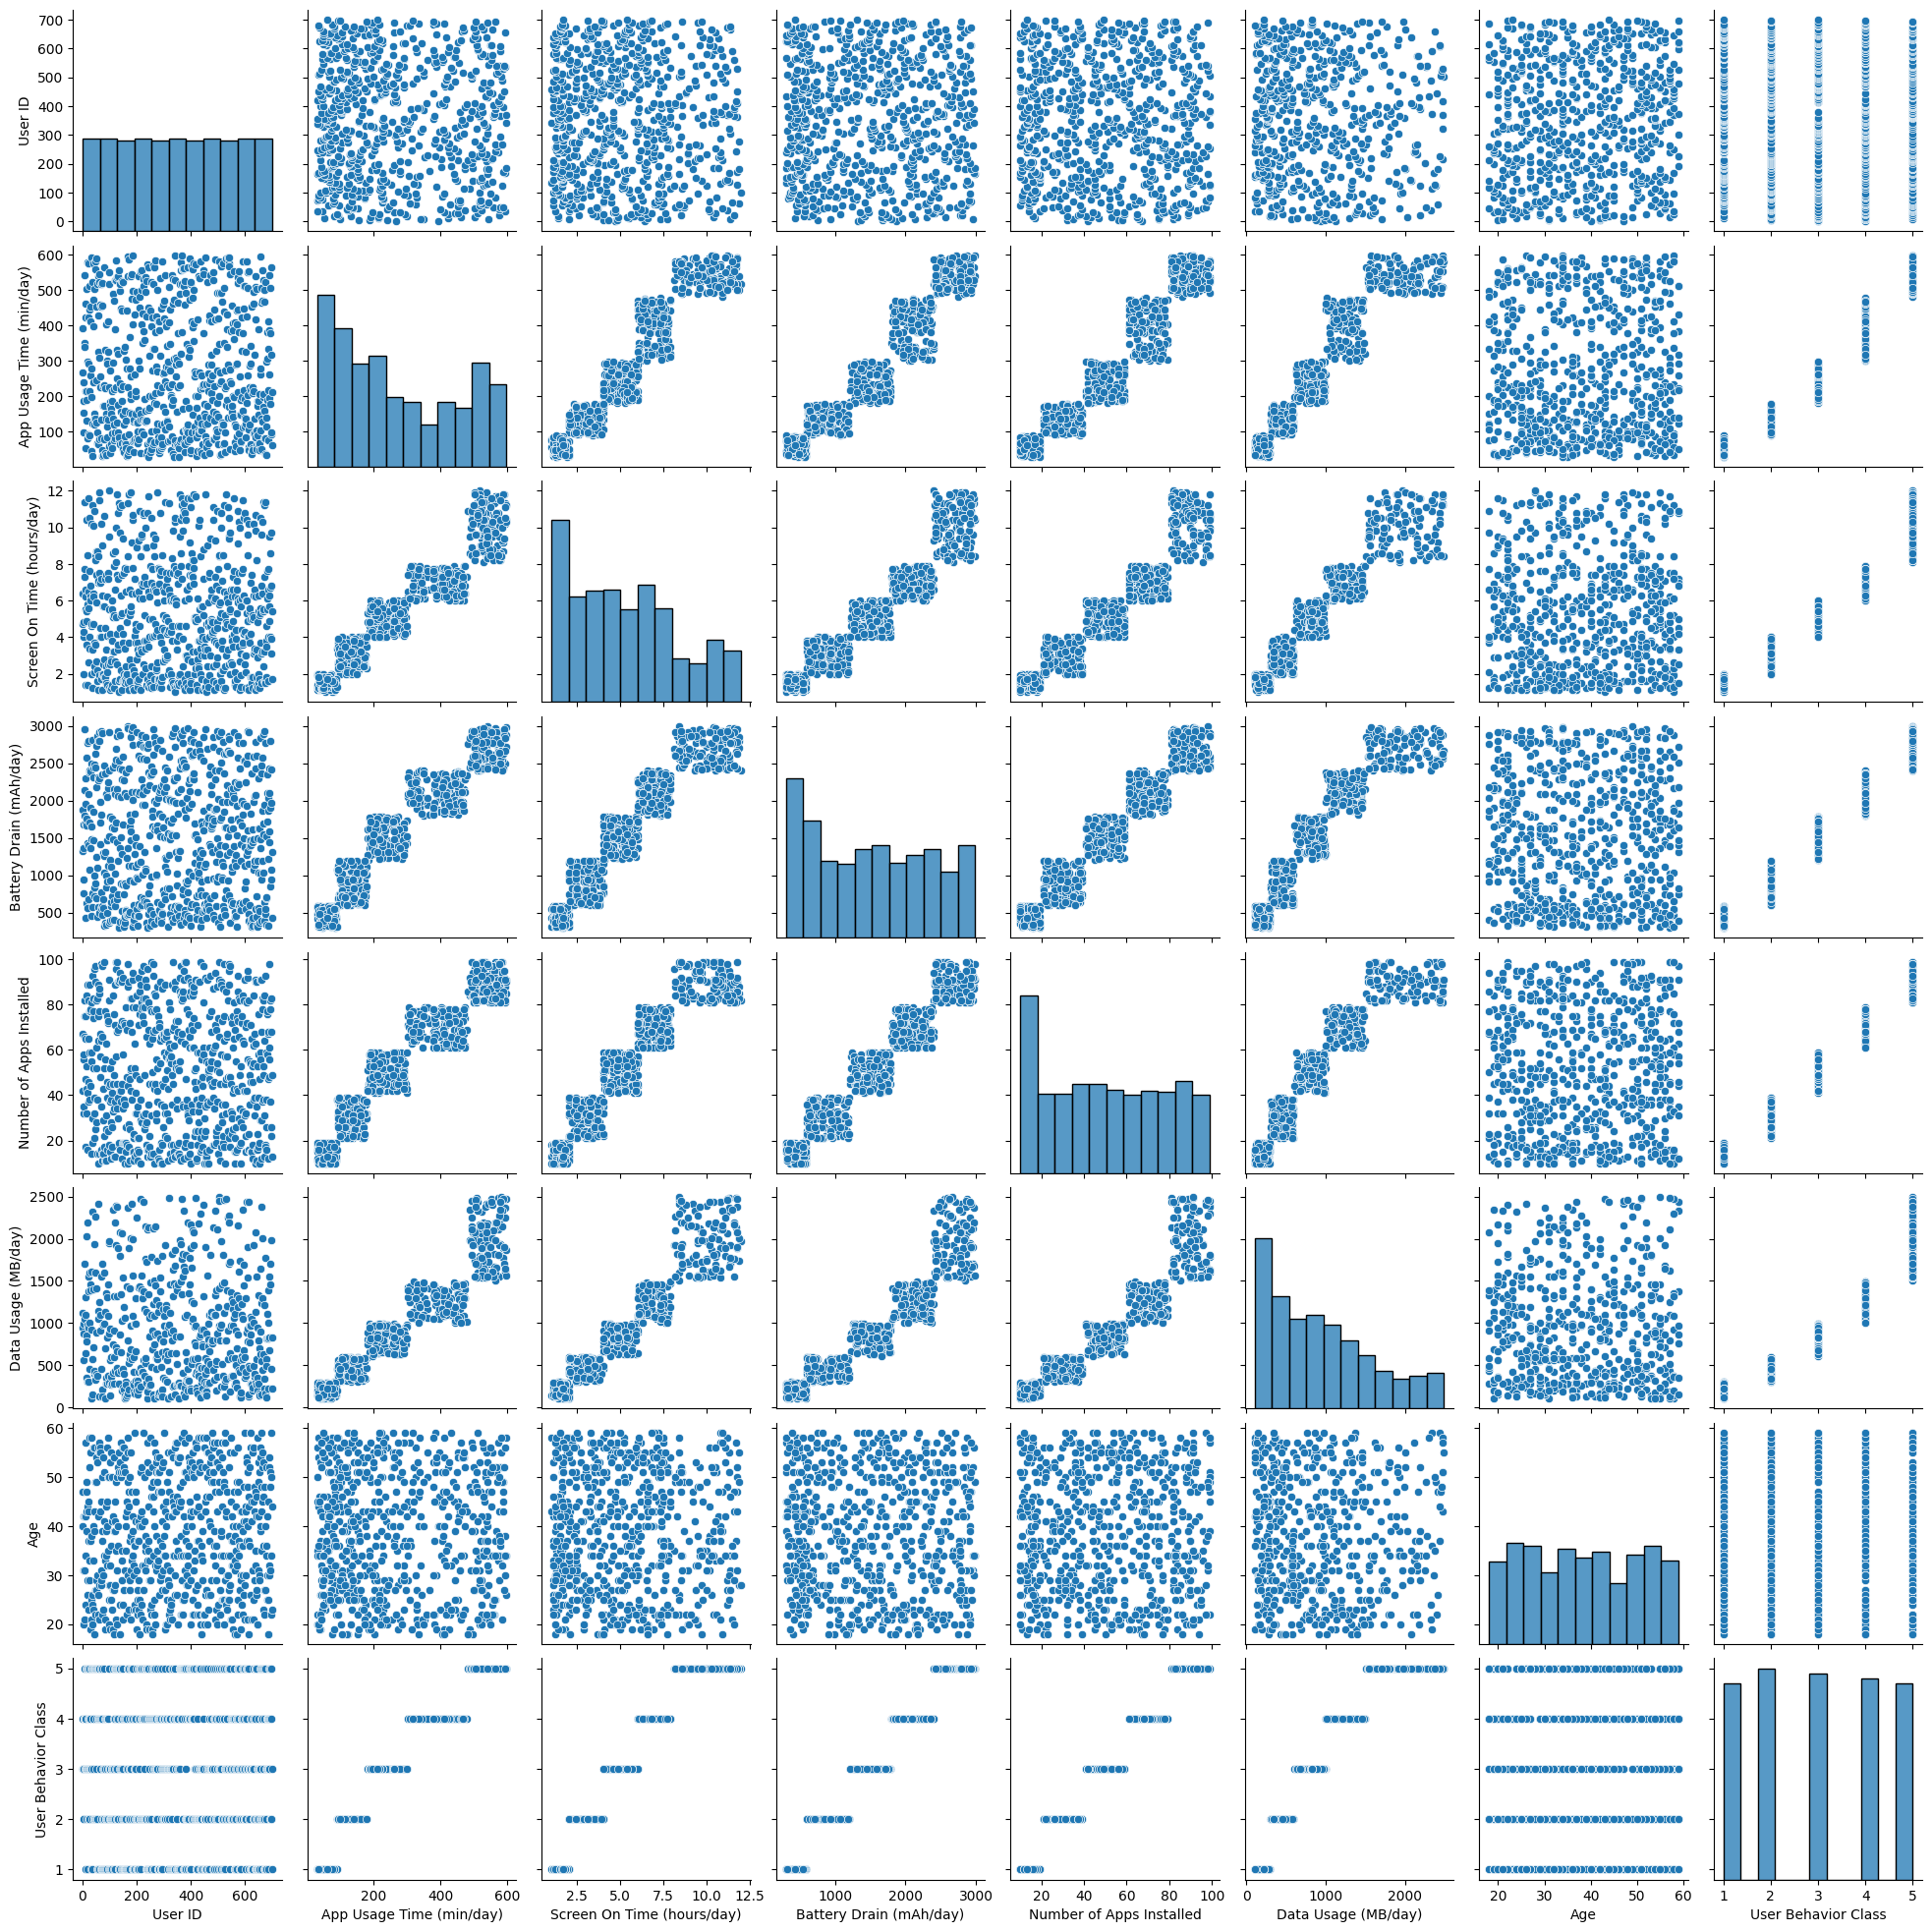

In [ ]:
sns.pairplot(df)

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
perc_miss_values = df.isnull().sum() / len(df) * 100
perc_miss_values.reset_index().rename(columns={"index": "column", 0: "% missing"})

,column,% missing
0,User ID,0.0
1,Device Model,0.0
2,Operating System,10.0
3,App Usage Time (min/day),0.0
4,Screen On Time (hours/day),0.0
5,Battery Drain (mAh/day),0.0
6,Number of Apps Installed,0.0
7,Data Usage (MB/day),20.0
8,Age,5.0
9,Gender,0.0


In [ ]:
perc_miss_values = df.isnull().sum()
perc_miss_values

,0
User ID,0
Device Model,0
Operating System,70
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),140
Age,35
Gender,0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

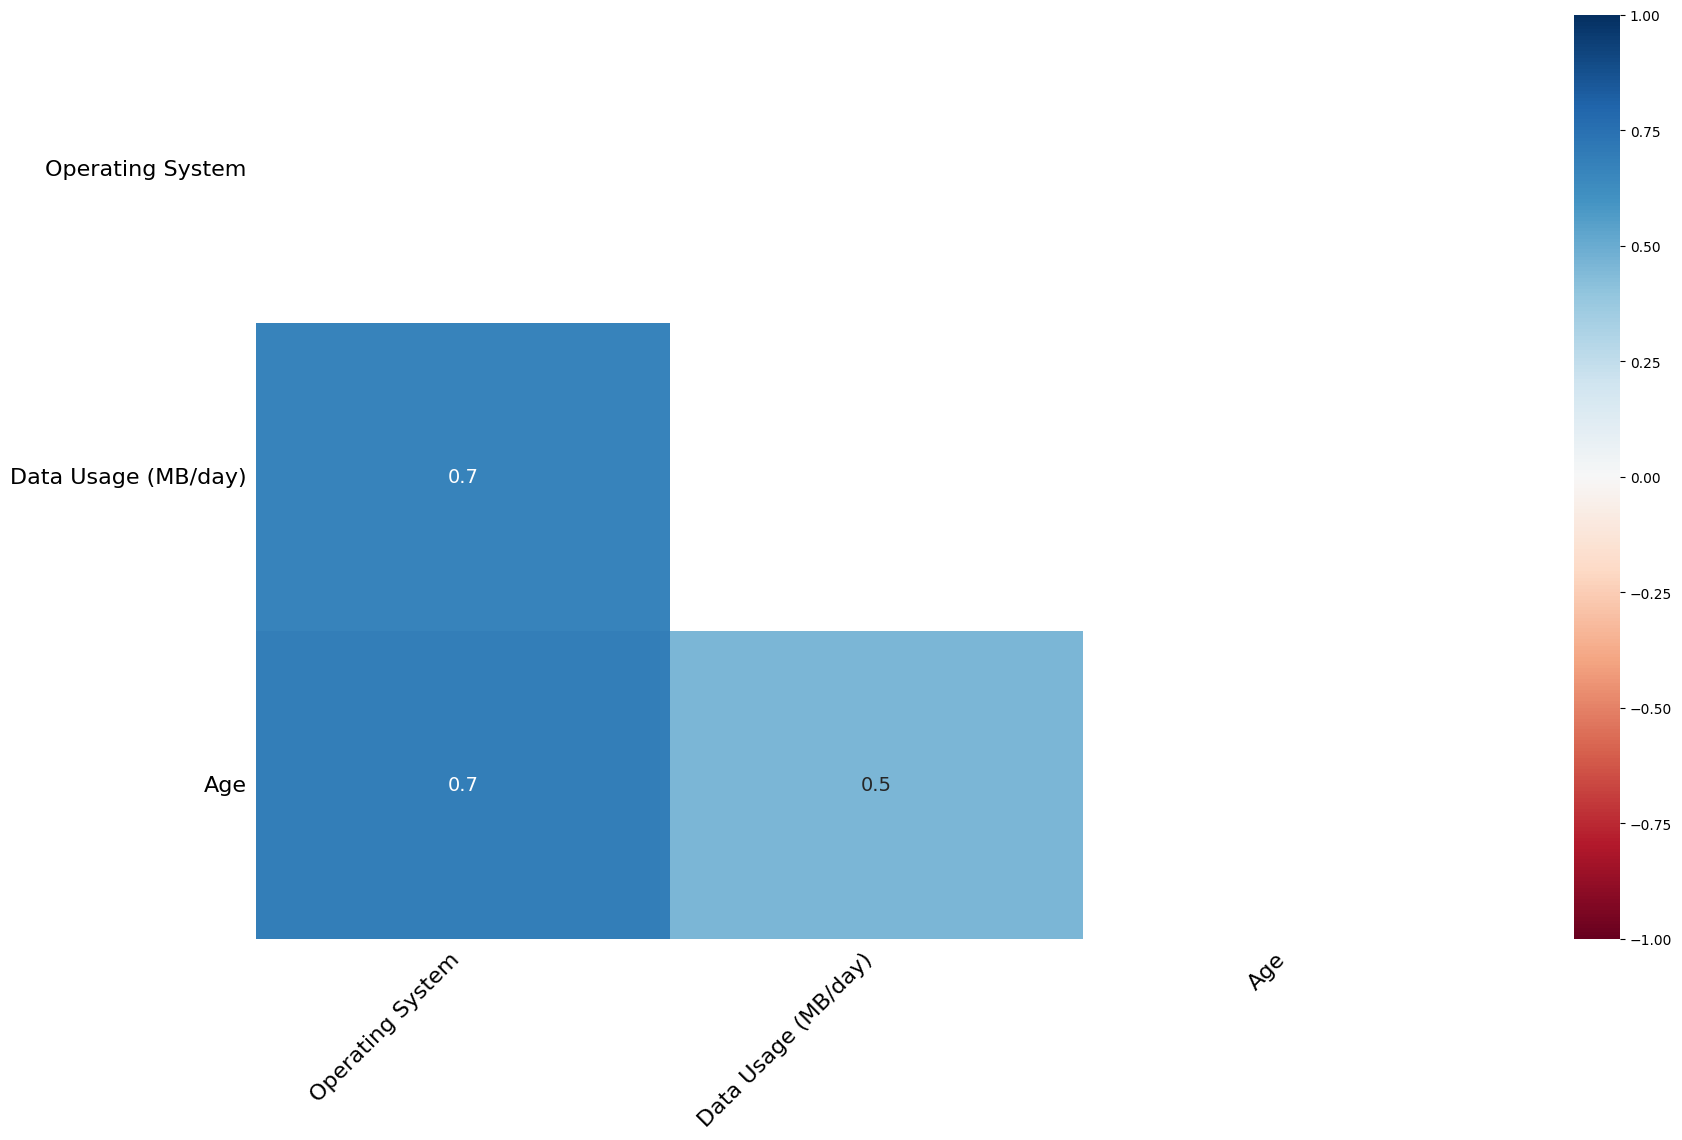

In [ ]:
msno.heatmap(df)

<Axes: >

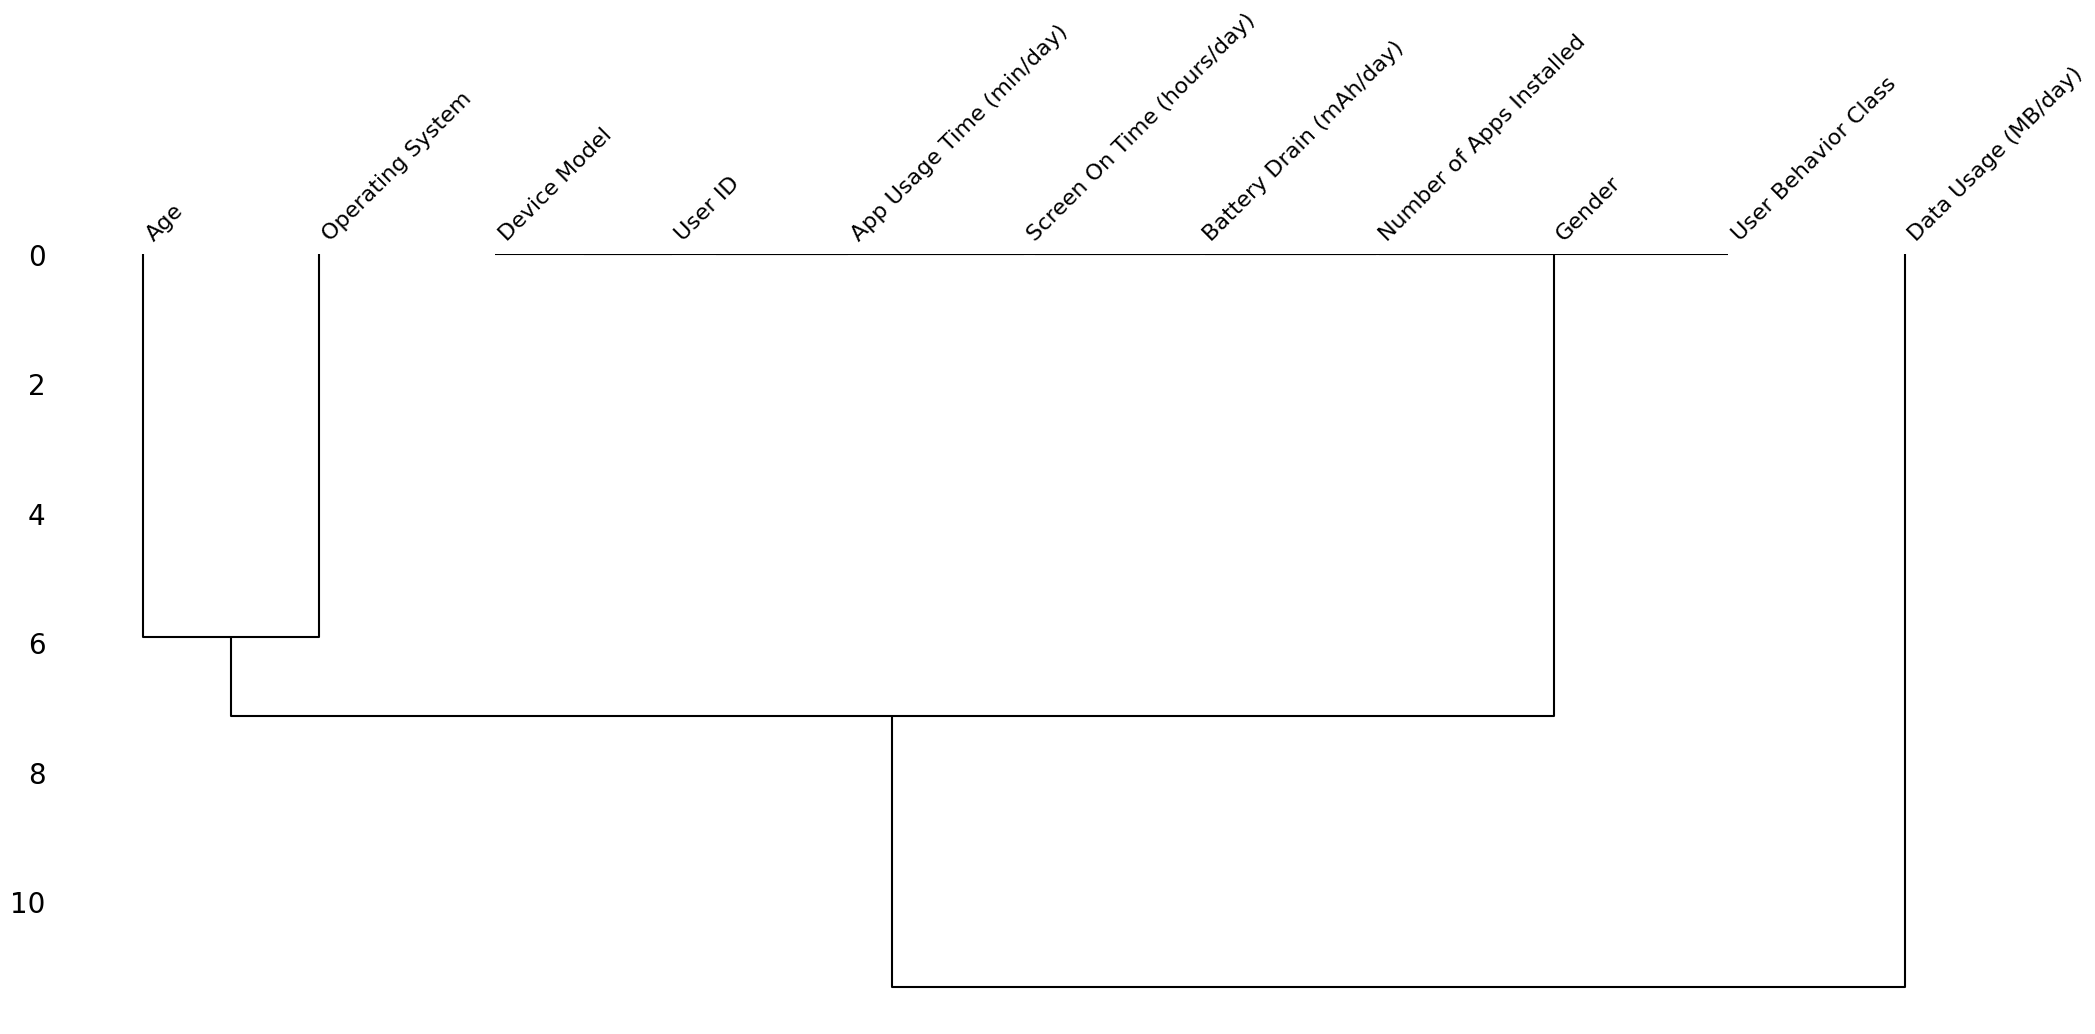

In [ ]:
msno.dendrogram(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Operating System', 'Data Usage (MB/day)']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
df[['Age', 'Operating System', 'Data Usage (MB/day)']] = imputed_data

In [ ]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x = df.copy()
x = x.drop(columns={'User Behavior Class', 'User ID'})
y = df['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = classifier.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  1  0  0  0]
 [ 0 26  1  0  0]
 [ 0  0 32  0  0]
 [ 0  0  1 24  0]
 [ 0  0  0  0 30]]
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        26
           2       0.96      0.96      0.96        27
           3       0.94      1.00      0.97        32
           4       1.00      0.96      0.98        25
           5       1.00      1.00      1.00        30

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

## Feature Scaling
Standardize the features appropriately.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
best_knn_model = grid_search.best_estimator_
y_pred_best = best_knn_model.predict(X_test)

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
print(y_pred_best)

[1 2 3 4 1 3 4 1 4 1 3 3 3 4 4 5 3 2 5 5 2 1 5 4 5 5 2 2 4 1 2 2 1 3 4 3 2
 3 1 1 4 5 4 5 3 1 5 3 5 1 2 3 1 1 2 4 2 2 1 5 3 3 4 2 3 4 4 3 1 5]
